<a href="https://colab.research.google.com/github/bimawardhana/traveloka-data-analysis/blob/master/traveloka-data-challenge/Solution_BimaSatria_SuryaWardhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAVELOKA CUSTOMERS ANALYSIS & INSIGHT**

**BIMA SATRIA SURYA WARDHANA**

*Data Analyst (DA) — Marketing Analytics*


---



This analysis is used as a part of [Traveloka Data Challenge](https://traveloka.tau-data.com/2019/10/23/2019-tdc/) — using real cases scenario of Traveloka customers. Data used has been altered to match the challenges' requirement; therefore, some insights might not reflect the real world situation. However, some methods used in this analysis might be useful for any real-world analysis that might be conducted in the future.

Analysis will be triggered by patterns and characteristics found in Traveloka customers data based on the sample data given — *kindly refer to Data Exploration section for the sample data details* — so analysis with starts with data exploration to find pattern and characteristics, formulating problem statement, and then do deeper analysis on the data to answer the problem statement.

# 1. DATA EXPLORATION


This section covers several processes of data understanding, including: 1) ***extracting data*** from the sources, and 2) ***data preparation*** — removing empty and unnecessary values as well as data schema adjustment.



### 1.1. Data Extraction

In [0]:
from google.colab import auth
from google.cloud import bigquery

In [3]:
# BIG QUERY AUTHENTICATION — interactively using web browser
try:
  auth.authenticate_user()
  print("AUTHENTICATION SUCCEEDED")
except:
  print("AUTHENTICATION FAILED")

# CONNECT TO PROJECT TO BE USED
try:
  client = bigquery.Client(project='tvlk-data-mktscience-dev')
  print("PROJECT CONNECTION SUCCEEDED")
except:
  print("PROJECT CONNECTION FAILED")

AUTHENTICATION SUCCEEDED
PROJECT CONNECTION SUCCEEDED


**Data context #1:**
Data is an all time data snapshot — being snapshotted per month. Data must be filtered only from the latest snapshot month.

In [7]:
# SEARCHING THE LATEST SNAPSHOT MONTH — to be used for filtering on data extraction
latest_snapshot_month = client.query(
  '''
    SELECT 
      CAST(MAX(snapshot_month) AS STRING) AS date
    FROM 
      `tvlk-data-mktscience-dev.data_challenge.customer_lifecycle`
  ''').to_dataframe().date[0]

print("LATEST SNAPSHOT MONTH: %s" % latest_snapshot_month)

LATEST SNAPSHOT MONTH: 2015-12-01


In [0]:
# IMPORTING DATA — analysis to be done in the dataframe
tvlk_customers = client.query(
    """
      SELECT
        *
      FROM
        `tvlk-data-mktscience-dev.data_challenge.customer_lifecycle`
      WHERE
        snapshot_month = \'%s\'
    """ % (latest_snapshot_month)).to_dataframe()

### 1.2. Data Preparation

In [89]:
# SHOWING DATA TYPES OF THE DATA
tvlk_customers.dtypes

row_num                        int64
profile_id                     int64
last_ads_id                   object
snapshot_month                object
churn_cut_off                  int64
first_issued_month            object
last_issued_month             object
lifecycle                     object
bucket_gbv_usd_all             int64
bucket_issued_1y               int64
bucket_visit_1y                int64
bucket_search_1y               int64
bucket_gbv_1y                  int64
bucket_netrev_1y               int64
bucket_coupon_1y               int64
visit_count_all              float64
search_count_all             float64
issued_count_all             float64
gbv_usd_all                  float64
net_revenue_usd_all          float64
coupon_usage_usd_all         float64
burnt_external_points_all     object
burnt_internal_points_all     object
earned_points_all             object
selling_points_all            object
country                       object
is_registered                   bool
i

Many of the data types in the tvlk_customers data doesn't match the required ones. This might be because of: 

*   ***NaN values in the fields*** — causing the data types of numeric columns to be OBJECT instead. NaN values should be filled with zero.
*   ***different data format*** — some boolean columns are notated as bool (TRUE/FALSE), some others are notated as integer (1/0). Standardisation for this is required.

In [90]:
# CHANGED NaN VALUES WITH 0
columns_to_change = ["burnt_external_points_all",
                     "burnt_internal_points_all",
                     "earned_points_all",
                     "selling_points_all",
                     "earned_points",
                     "burnt_internal_points",
                     "burnt_external_points",
                     "selling_points",
                     "is_subscribed"
                     ]
for column in columns_to_change:
  tvlk_customers[column].fillna(0, inplace = True)
  print("FILL NA WITH 0 — %s" % column)

FILL NA WITH 0 — burnt_external_points_all
FILL NA WITH 0 — burnt_internal_points_all
FILL NA WITH 0 — earned_points_all
FILL NA WITH 0 — selling_points_all
FILL NA WITH 0 — earned_points
FILL NA WITH 0 — burnt_internal_points
FILL NA WITH 0 — burnt_external_points
FILL NA WITH 0 — selling_points
FILL NA WITH 0 — is_subscribed


In [0]:
# CHANGED INT TO BOOLEAN
tvlk_customers["is_subscribed"].replace({1: True, 0: False}, inplace = True)

In [92]:
# CHECKING DATA TYPE — POST PRE-PROCESSING
tvlk_customers.dtypes

row_num                        int64
profile_id                     int64
last_ads_id                   object
snapshot_month                object
churn_cut_off                  int64
first_issued_month            object
last_issued_month             object
lifecycle                     object
bucket_gbv_usd_all             int64
bucket_issued_1y               int64
bucket_visit_1y                int64
bucket_search_1y               int64
bucket_gbv_1y                  int64
bucket_netrev_1y               int64
bucket_coupon_1y               int64
visit_count_all              float64
search_count_all             float64
issued_count_all             float64
gbv_usd_all                  float64
net_revenue_usd_all          float64
coupon_usage_usd_all         float64
burnt_external_points_all      int64
burnt_internal_points_all      int64
earned_points_all              int64
selling_points_all             int64
country                       object
is_registered                   bool
i

In [0]:
tvlk_customers.interpolate(inplace = True)

In [94]:
# VIEW DATA — POST PROCESSING
tvlk_customers.head(10)

,row_num,profile_id,last_ads_id,snapshot_month,churn_cut_off,first_issued_month,last_issued_month,lifecycle,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,issued_count_all,gbv_usd_all,net_revenue_usd_all,coupon_usage_usd_all,burnt_external_points_all,burnt_internal_points_all,earned_points_all,selling_points_all,country,is_registered,is_subscribed,issued_count,sum_gbv_usd,net_revenue_usd,search_count,visit_count,coupon_usage_usd,earned_points,burnt_internal_points,burnt_external_points,selling_points,is_customer,is_churn,product,product_breadth
0,147551,796929,None,2015-12-01,24,2013-07-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,12.0,12.0,12.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
1,462257,320465,None,2015-12-01,24,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
2,1021708,359569,None,2015-12-01,24,2013-06-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
3,1368922,481681,None,2015-12-01,24,2013-06-01,2013-06-01,09. at risk,1,1,1,2,1,1,5,4.0,8.0,4.0,0.0,0.0,0.0,0,0,0,0,ID,False,True,0.0,0.0,0.0,2,1,0.0,0,0,0,0,True,True,all,1
4,124127,186377,None,2015-12-01,24,2013-05-01,2013-05-01,09. at risk,1,1,1,1,1,1,5,4.0,4.0,4.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
5,254226,497377,None,2015-12-01,24,2013-06-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,10.0,10.0,10.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
6,271805,355465,None,2015-12-01,24,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,4.0,4.0,4.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
7,824814,156321,None,2015-12-01,24,2013-05-01,2013-08-01,11. hibernating,1,1,1,1,1,1,5,3.0,3.0,3.0,0.0,0.0,0.0,0,0,0,0,ID,False,True,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
8,1181019,279241,None,2015-12-01,24,2013-08-01,2013-08-01,11. hibernating,1,1,1,1,1,1,5,3.0,3.0,3.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
9,1221682,421881,None,2015-12-01,24,2013-06-01,2013-06-01,11. hibernating,1,1,1,1,1,1,5,3.0,3.0,3.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1


# 2. ANALYSIS


This section covers several processes of analysis including 1) **hypothesis**, 2) **data pattern/characteristics exploration** to prove hypothesis. 


## 2.1. Problem Statement & Hypothesis

### 2.1.1. Problem Statement 

One of the holy grail of customer relationship management is that ***it is a lot more expensive to acquire new customers than retaining existing one*** — meaning it is important to prevent existing customers to churn. Then the question is **how we can prevent Traveloka customers from churning?**

### 2.1.2. Hypothesis

The hypothesis is that **there are distinct characteristics that can differentiate churn customer to other customers**. Knowing these characteristics gives the business enough knowledge to treat customers that match these characteristics to prevent them to churn in the future — making business decisions like marketing and feature development more effective.

Approach to prove the hypothesis:


*   Find the **data distribution** of few important metrics over the two groups.
*   Find differences between the two groups on the **customer lifecycle** side.
*italicized text*


## 2.2. Distribution Analysis

Below are the distribution comparison between churn customer and not churn customer by how much activity and transaction (including the value of it like GBV, Revenue, and coupon being used) over all time.

### ANALYSIS 1: Comparing all time activities between churn and non-churn customers


---



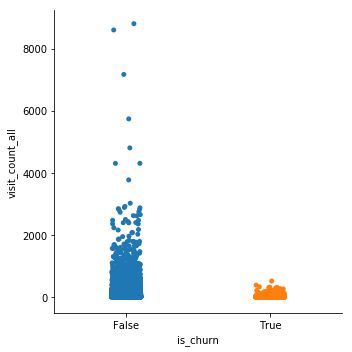

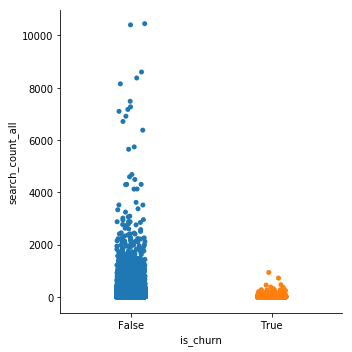

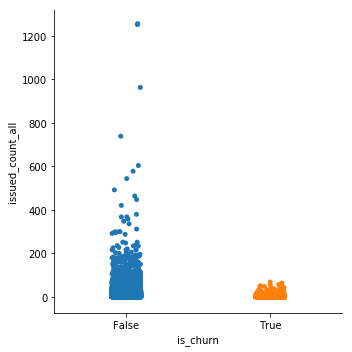

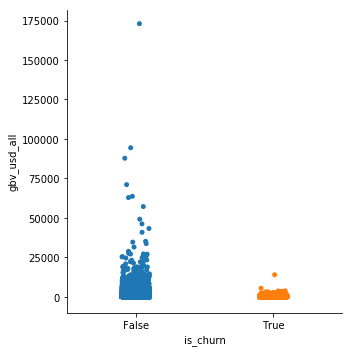

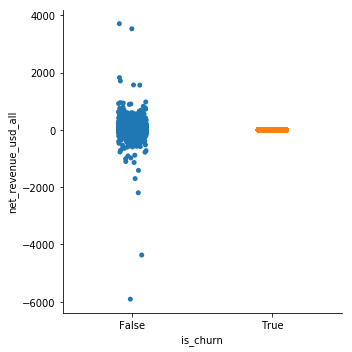

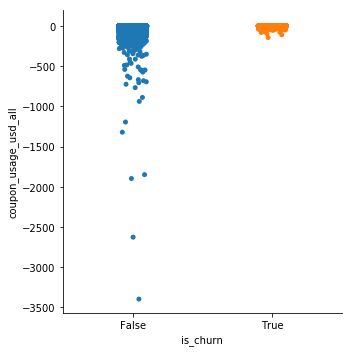

In [95]:
for metrics in ["visit_count_all",
                "search_count_all",
                "issued_count_all",
                "gbv_usd_all",
                "net_revenue_usd_all",
                "coupon_usage_usd_all"]:
  sns.catplot(x="is_churn", y=metrics, data=tvlk_customers[['is_churn', metrics]])

The distribution plot doesn't show any significant differences — only that distribution covers wider range of values for the non-churn customers — meaning ***customers with extreme logs of activities (significant high number of visit and transaction) is less likely to churn.***

Next analysis:
*   Split the distribution based on other attributes — e.g. lifecycle, country, etc.
*   Analyse distribution on current month's activities & transaction.co

### ANALYSIS 2: Splitting ANALYSIS 1 with Additional Dimensions


---



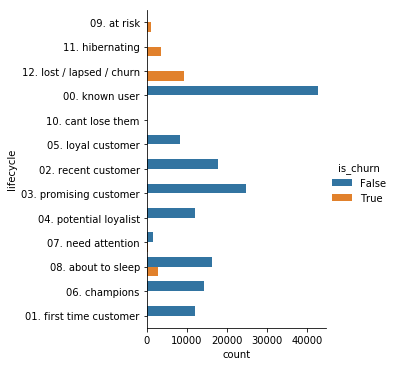

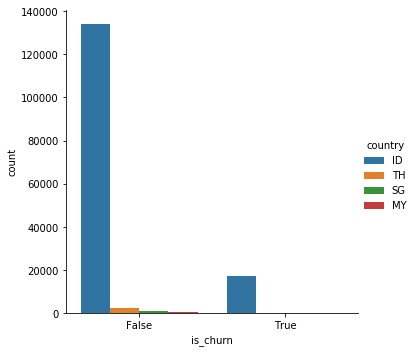

In [96]:
# SPLITTING WITH DIMENSION LIFECYCLE
sns.catplot(y="lifecycle", hue='is_churn', kind='count', data=tvlk_customers[['is_churn', 'lifecycle', 'profile_id']])
sns.catplot(x="is_churn", hue='country', kind='count', data=tvlk_customers[['is_churn', 'country', 'profile_id']])



*   Deeper analysis with **lifecycle** shows that churn customer only comes from certain lifecycle — that is *at risk*, *hibernating*, and *lost/lapsed/churn* (these lifecycle groups only contains churned customers). Some from *about to sleep* customers also churned. These lifecycle can be a good sign of churn customer — specific treatment should be given to customers in these groups to prevent them to churn in the future.
*   No significant insights from **country** analysis.



### ANALYSIS 3: Analysing Distribution of Current Month Activities & Transaction


---



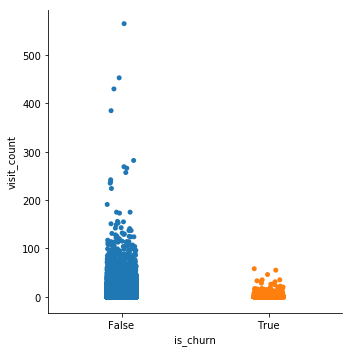

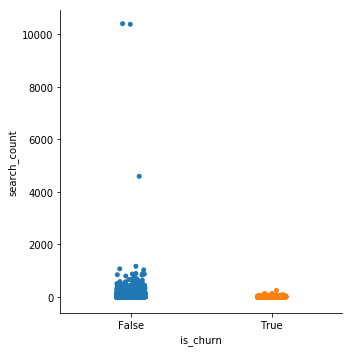

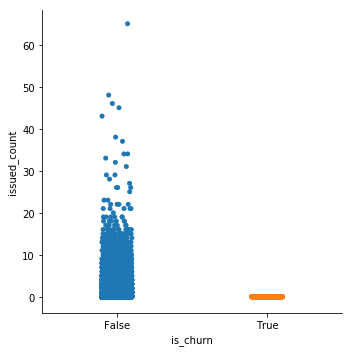

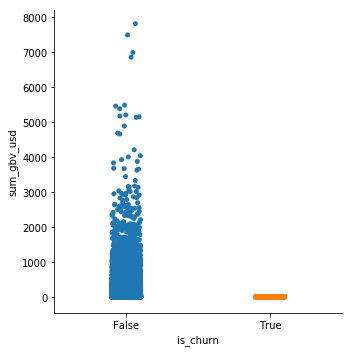

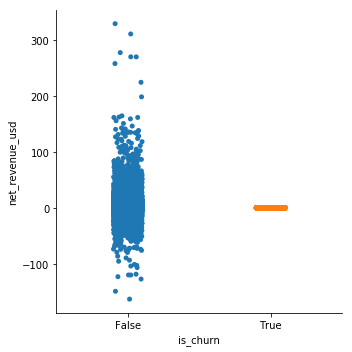

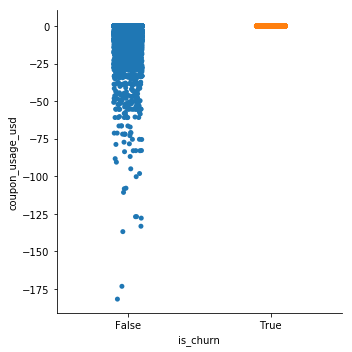

In [98]:
for metrics in ["visit_count",
                "search_count",
                "issued_count",
                "sum_gbv_usd",
                "net_revenue_usd",
                "coupon_usage_usd"]:
  sns.catplot(x="is_churn", y=metrics, data=tvlk_customers[['is_churn', metrics]])

Churn customer don't issue or do transaction at the current month — this might be a good indicator of churn customer. Further analysis of issued and visit trend might be useful.

In [0]:
%%bigquery --project tvlk-data-mktscience-dev trend_data
SELECT 
    CAST(snapshot_month AS DATE) AS month,
    AVG(visit_count) avg_visit,
    AVG(issued_count) avg_issued
FROM 
    `tvlk-data-mktscience-dev.data_challenge.customer_lifecycle` AS all_customers
    INNER JOIN (SELECT profile_id FROM `tvlk-data-mktscience-dev.data_challenge.customer_lifecycle` WHERE snapshot_month = '2015-12-01' AND is_churn = TRUE) AS churn_customers
    ON all_customers.profile_id = churn_customers.profile_id
GROUP BY  
    1
ORDER BY
    1

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

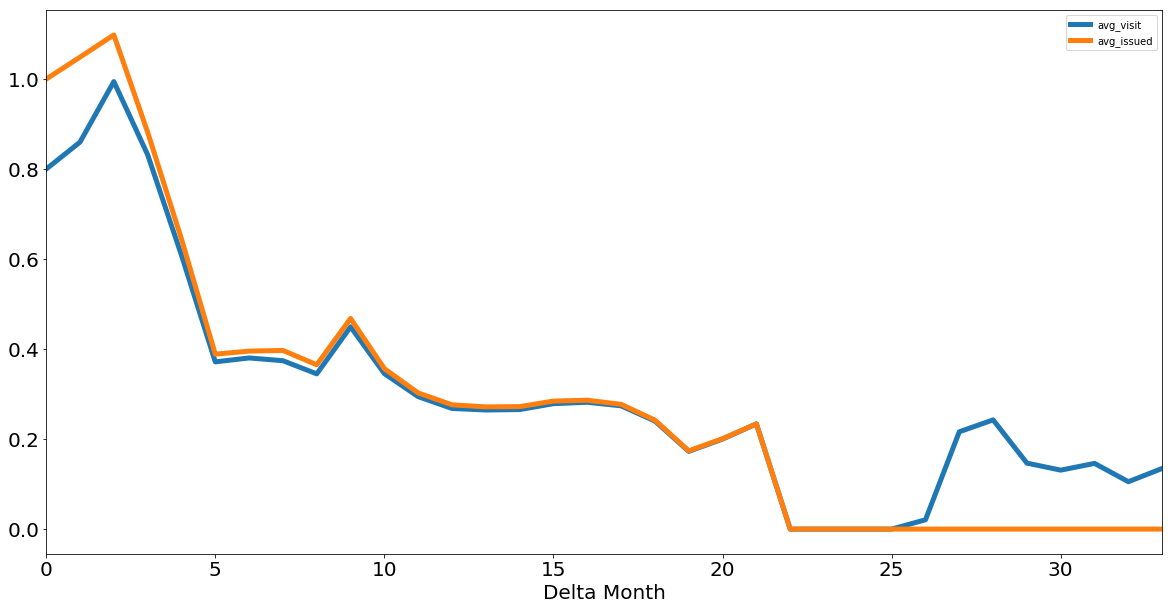

In [43]:
trend_data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Delta Month', fontsize=20);

Issuance trend turn to zero for several month — for customer who is churn by 2015-12-01. Customers who isn't purchasing might be a good indicator of a potential churn.

# 3. CONCLUSION & RECOMMENDATION

### 3.1. Conclusion

There are several characteristics that can differentiate churn customer. Few of them, caught on this analysis, include following points.
*   Customers who has significantly high visits, search, and transaction (compared to the whole population of customer) are less likely to churn — might want to exclude these type of customers from churn analysis.
*   Customers who are classified as *at risk*, *hibernating*, and *lost/lapsed/churn* have high potential to churn.
*   Customers who isn't issuing for a while might be churning — need further discussion on how long is for a while.

### 3.2. Recommendation

*   Put special treatment (PN/NL/Coupon Promotion) to people in risk, hibernating, and lost/lapsed/churn customer segments to prevent them from churning in the future.
*   Put also special treatment in customer who isn't issuing (in a month — for starter).



# APPENDIX (drafts/useful code)

In [19]:
tvlk_customers.head(10)

,row_num,profile_id,last_ads_id,snapshot_month,churn_cut_off,first_issued_month,last_issued_month,lifecycle,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,issued_count_all,gbv_usd_all,net_revenue_usd_all,coupon_usage_usd_all,burnt_external_points_all,burnt_internal_points_all,earned_points_all,selling_points_all,country,is_registered,is_subscribed,issued_count,sum_gbv_usd,net_revenue_usd,search_count,visit_count,coupon_usage_usd,earned_points,burnt_internal_points,burnt_external_points,selling_points,is_customer,is_churn,product,product_breadth
0,147551,796929,None,2015-12-01,24,2013-07-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,12.0,12.0,12.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
1,462257,320465,None,2015-12-01,24,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
2,1021708,359569,None,2015-12-01,24,2013-06-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
3,1368922,481681,None,2015-12-01,24,2013-06-01,2013-06-01,09. at risk,1,1,1,2,1,1,5,4.0,8.0,4.0,0.0,0.0,0.0,0,0,0,0,ID,False,True,0.0,0.0,0.0,2,1,0.0,0,0,0,0,True,True,all,1
4,124127,186377,None,2015-12-01,24,2013-05-01,2013-05-01,09. at risk,1,1,1,1,1,1,5,4.0,4.0,4.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
5,254226,497377,None,2015-12-01,24,2013-06-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,10.0,10.0,10.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
6,271805,355465,None,2015-12-01,24,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,4.0,4.0,4.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
7,824814,156321,None,2015-12-01,24,2013-05-01,2013-08-01,11. hibernating,1,1,1,1,1,1,5,3.0,3.0,3.0,0.0,0.0,0.0,0,0,0,0,ID,False,True,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
8,1181019,279241,None,2015-12-01,24,2013-08-01,2013-08-01,11. hibernating,1,1,1,1,1,1,5,3.0,3.0,3.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1
9,1221682,421881,None,2015-12-01,24,2013-06-01,2013-06-01,11. hibernating,1,1,1,1,1,1,5,3.0,3.0,3.0,0.0,0.0,0.0,0,0,0,0,ID,False,False,0.0,0.0,0.0,0,0,0.0,0,0,0,0,True,True,all,1


In [0]:
import seaborn as sns

In [0]:
tvlk_customers["is_churn"].replace({True: 1, False: 0}, inplace = True)

In [32]:
tvlk_customers[['is_churn', 'earned_points_all']]

,is_churn,earned_points_all
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [0]:
g = sns.pairplot(df_app_install_with_net_revenue_agg
                     .loc[df_app_install_with_net_revenue_agg['country']==country_tmp, :], 
                     hue='campaign', diag_kind='kde', height=4, aspect=1)
    plt.title(country_tmp)
    print(g)